In [1]:
# 소프트맥스 함수 예시  (다중 클래스 분류를 위해 )
import numpy as np
def softmax(values):
    array_values = np.exp(values)
    return array_values / np.sum(array_values)
values = [2, 1, 5, 0.5]
y = softmax(values) # array([0.04613281, 0.01697131,
0.926602 

0.926602

In [2]:
# 다중 클래스 분류 구현 
# 1. 데이터 불러오기 
# datasets 모듈을 호출
# load_digits 함수로 딕셔너리 타입 데이터를 부름  

from sklearn import datasets
digit_dataset = datasets.load_digits()
digit_dataset.keys()   # 데이터 구성 확인 

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [7]:
digit_dataset["images"].shape # 이미지 데이터 구조 확인 
# 첫 번째 명령은 첫 번째 이미지의 타겟 레이블을 출력. 이 숫자는 해당 이미지가 어떤 숫자를 나타내는지.
# 두 번째 명령은 첫 번째 이미지의 실제 픽셀 데이터를 8x8 배열 형태로 출력. 이 배열은 숫자 이미지의 그레이스케일 값을 포함하며 숫자가 클수록 픽셀이 더 밝음.
digit_dataset["target"][0]
digit_dataset["images"][0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

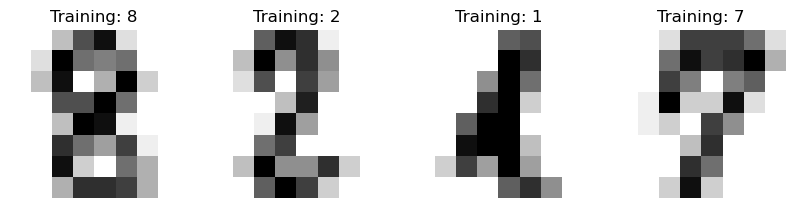

In [9]:
import matplotlib.pyplot as plt
from random import randint
# plt.subplots(nrows=1, ncols=4, figsize=(10, 3)): 1x4 격자의 서브플롯을 생성 / 각 서브플롯은 하나의 이미지를 표시할 공간을 제공한다. figsize는 전체 플롯의 크기를 설정함

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))# (1)
for ax in axes: # (2)
    num = randint(1, 1000) # (3)
    image = digit_dataset["images"][num]  # 선택된 인덱스에 해당하는 이미지를 가져옴 
    label = digit_dataset["target"][num]  # 선택된 인덱스에 해당하는 이미지의 레이블을 가져옴 
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r,interpolation='nearest') # (4)
    ax.set_title('Training: %i' % label)

In [10]:
# 데이터가 8×8 행렬이므로 2D 이미지로 표현되었지만 다음 코드와 같이 총 64개의 피쳐(벡터 형태)를 가진 하나의 데이터로 받을 수 있음
digit_dataset["data"][0].shape

(64,)

In [11]:
# 3. 데이터 분류
from sklearn.model_selection import train_test_split

X = digit_dataset["data"] # (1)
y = digit_dataset["target"] # (1)
X_train, X_test, y_train, y_test = train_test_split(X, y)
# (2)

In [12]:
# 4.모델 생성 
from sklearn.linear_model import LogisticRegression

logreg_ovr = LogisticRegression(multi_class="ovr")  # ovr : 클래스 모드를 모두 이진모델로 만들어 학습
logreg_softmax = LogisticRegression(multi_class="multinomial", solver="sag") # multinomial : 소프트맥스 함수를 사용하여 계산하는 방식. 경사하강법의 매개변수 solver를 sag으로 변경

logreg_ovr.fit(X_train, y_train)
logreg_softmax.fit(X_train, y_train)

/opt/anaconda3/envs/24ML/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/24ML/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(multi_class='multinomial', solver='sag')

In [13]:
# 5. 성능 측정 
# 일반적으로 다중클래스 분류도 기존 혼동행렬을 사용
# 각 클래스 대비 예측한 값을 행렬 형태로 표현
from sklearn.metrics import confusion_matrix
y_pred = logreg_ovr.predict(X_test).copy()
y_true = y_test.copy()
confusion_matrix(y_true, y_pred)

array([[33,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 58,  0,  1,  0,  0,  0,  0,  1,  0],
       [ 0,  0, 40,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 41,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 38,  0,  0,  0,  0,  1],
       [ 0,  1,  0,  0,  0, 46,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 50,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0, 45,  0,  0],
       [ 0,  6,  1,  0,  0,  0,  0,  0, 40,  0],
       [ 0,  1,  0,  2,  0,  0,  0,  1,  1, 42]])

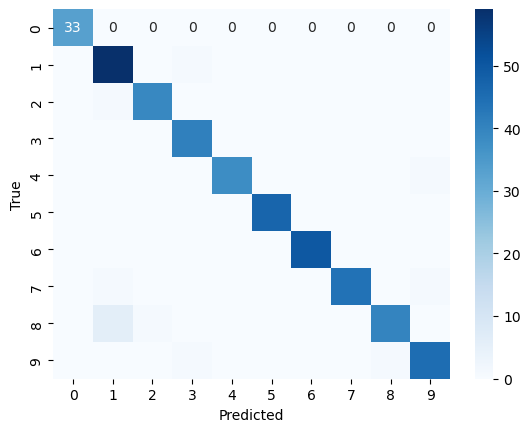

In [14]:
import seaborn as sns

y_pred = logreg_softmax.predict(X_test).copy()
y_true = y_test.copy()
cm=confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [15]:
# 라벨별로 분류 성능을 수치화하여 표시
# ‐ support : 실제 샘플 개수 (ex. ‘0’ 샘플 수 47개 )
# ‐ macro avg: 평균의 평균
# ‐ weighted avg: 가중 평균(ex. F1스코어의 가중평균 ▼)

from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.88      0.98      0.93        60
           2       0.97      0.97      0.97        40
           3       0.95      1.00      0.98        41
           4       1.00      0.97      0.99        39
           5       1.00      1.00      1.00        47
           6       1.00      1.00      1.00        50
           7       1.00      0.96      0.98        46
           8       0.98      0.85      0.91        47
           9       0.96      0.96      0.96        47

    accuracy                           0.97       450
   macro avg       0.97      0.97      0.97       450
weighted avg       0.97      0.97      0.97       450



In [ ]:
# ROC 커브와 AUC (머신러닝 모델의 성능을 평가하는 데 사용되는 중요한 도구 / 이들은 주로 이진 분류 문제에서 모델의 성능을 평가할 때 사용) 여기서의 임계값(thresholds)은 분류 결정을 내리기 위한 기준점
# 정밀도(precision)와 민감도(recall)는 일반적으로 둘 다 동시에 상승하기 어렵고 임계값(threshold)에 따라 변화가 일어남
# 두 값을 모두 고려하여 성능을 측정하기 쉽지 않음
# • ROC 커브(ROC curve) : 분류기의 임계값을 지속적으로 조정하여 정밀도와 민감도 간의 비율을 도식화 (클래스의 예측 확률이 나오는 모델에 사용 가능)




In [1]:
# ROC 커브와 AUC를 사이킷런 코드로 구현하기
# • 정답 y 값과 각 항목별 예측 확률을 scores에 저장
# • ROC 커브 함수인 roc_curve로 fpr, tpr, thresholds 반환

import numpy as np
from sklearn import metrics
y = np.array([1, 1, 2, 2])
scores = np.array([0.1, 0.4, 0.35, 0.8])
fpr, tpr, thresholds = metrics.roc_curve(y, scores, pos_label=2)
# fpr - array([0. , 0. , 0.5, 0.5, 1. ])
# tpr - array([0. , 0.5, 0.5, 1. , 1. ])
# thresholds - array([1.8 , 0.8 , 0.4 , 0.35, 0.1 ])

In [2]:
y = np.array([1, 1, 2, 2])
pred = np.array([0.1, 0.4, 0.35, 0.8])
fpr, tpr, thresholds = metrics.roc_curve(y, pred, pos_label=2)
roc_auc = metrics.auc(fpr, tpr)  # auc 함수는 주어진 FPR과 TPR 값들을 바탕으로 ROC 커브 아래의 면적을 계산 / roc_auc는 이 면적의 값을 저장 이 값이 높을수록 모델의 성능이 좋다고 평가
roc_auc

0.75

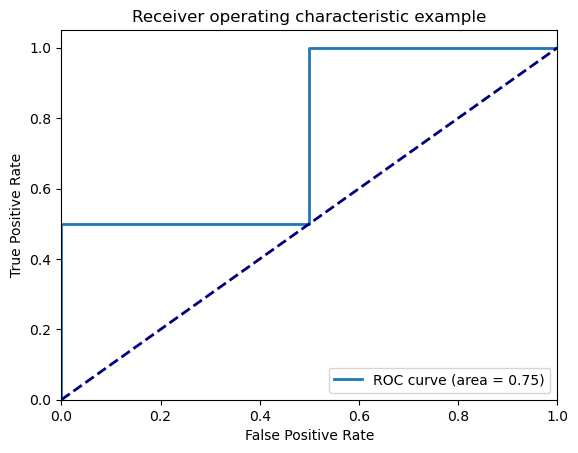

In [3]:
import matplotlib.pyplot as plt
plt.figure()
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()